In [21]:
import pandas as pd
import json

In [22]:
#Load the data about businesses
biz_file = open('Datasets\yelp_academic_dataset_business.json', encoding = "utf-8")
biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()])
biz_file.close()

In [23]:
biz_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Occurence')

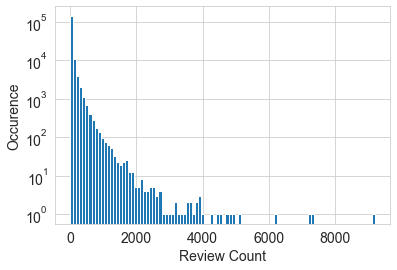

In [25]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax = ax, bins = 100)
ax.set_yscale('log')
ax.tick_params(labelsize = 14)
ax.set_xlabel('Review Count', fontsize = 14)
ax.set_ylabel('Occurence', fontsize = 14)

## Fixed width binning

In [26]:
import numpy as np
#spaced between 0-9
small_counts = np.random.randint(0,100,20)
FB_small_counts = small_counts/10 
large_counts =np.random.randint(1000,10000,10)


In [27]:
large_counts

array([3846, 7030, 4437, 2792, 3517, 6782, 1520, 7532, 5475, 3738])

In [28]:
small_counts

array([56, 44, 74,  6, 59, 53, 90, 63, 43, 30, 33, 75, 28, 36,  7, 29, 76,
        8, 95,  4])

In [29]:
large_counts = np.concatenate((small_counts, large_counts),axis=None)

In [30]:
np.floor(np.log10(large_counts))

array([1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 0., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

## Quantile Binning

In [31]:
deciles = biz_df['review_count'].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9])
deciles

0.1      6.0
0.2      7.0
0.3      9.0
0.4     12.0
0.5     17.0
0.6     24.0
0.7     35.0
0.8     57.0
0.9    117.0
Name: review_count, dtype: float64

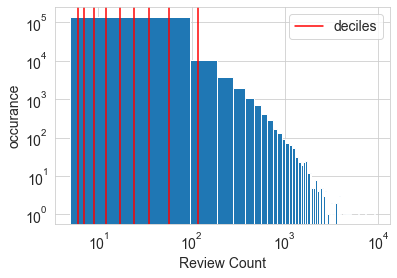

In [32]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax = ax, bins = 100)
for pos in deciles:
    handle = plt.axvline(pos, color = "r")

    
ax.set_yscale('log')
ax.set_xscale('log')

ax.tick_params(labelsize = 14)
ax.set_ylabel("occurance", fontsize = 14)
ax.set_xlabel("Review Count", fontsize = 14)
ax.legend([handle], ['deciles'], fontsize = 14)

In [33]:
pd.qcut(large_counts,4, labels = False)

array([1, 1, 2, 0, 1, 1, 2, 1, 1, 0, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 3, 3,
       3, 2, 3, 3, 2, 3, 3, 3], dtype=int64)

In [34]:
large_count_series = pd.Series(large_counts)

In [35]:
large_count_series.quantile([0.25,0.5,0.75])

0.25      33.75
0.50      68.50
0.75    3335.75
dtype: float64

Text(0, 0.5, 'occurance')

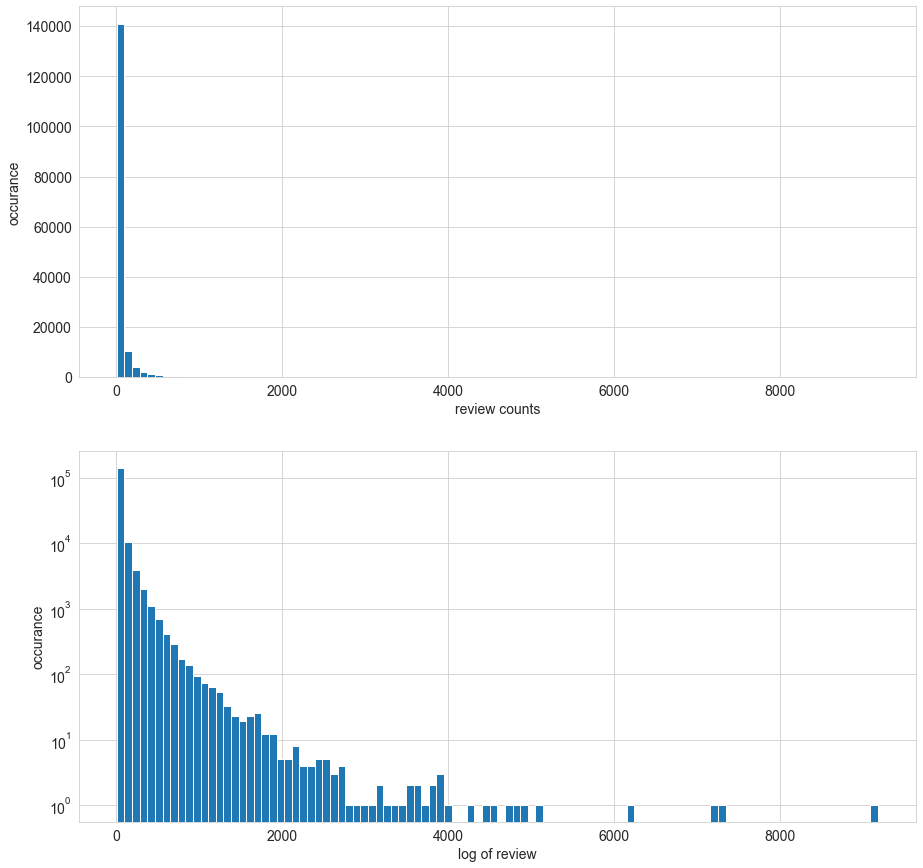

In [36]:
fig, ax = plt.subplots(2,1)
fig.set_figheight(15)
fig.set_figwidth(15)
biz_df['review_count'].hist(ax = ax[0], bins = 100)
ax[0].tick_params(labelsize = 14)
ax[0].set_xlabel("review counts", fontsize = 14)
ax[0].set_ylabel("occurance", fontsize = 14)

biz_df['review_count'].hist(ax= ax[1], bins = 100)
ax[1].tick_params(labelsize = 14)

ax[1].set_yscale("log")
ax[1].set_xlabel("log of review", fontsize = 14)
ax[1].set_ylabel("occurance", fontsize = 14)

In [37]:
biz_df["log_rc"] = np.log(biz_df["review_count"] +1)

Text(0, 0.5, 'occurance')

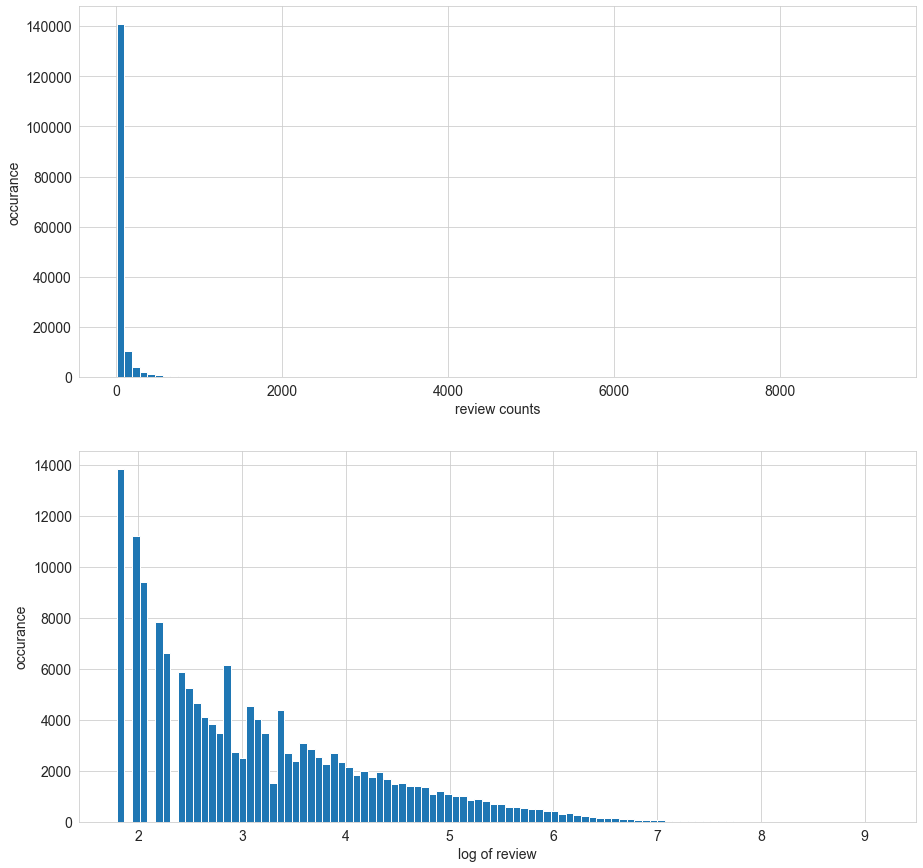

In [38]:
fig, ax = plt.subplots(2,1)
fig.set_figheight(15)
fig.set_figwidth(15)
biz_df['review_count'].hist(ax = ax[0], bins = 100)
ax[0].tick_params(labelsize = 14)
ax[0].set_xlabel("review counts", fontsize = 14)
ax[0].set_ylabel("occurance", fontsize = 14)

biz_df['log_rc'].hist(ax= ax[1], bins = 100)
ax[1].tick_params(labelsize = 14)

ax[1].set_xlabel("log of review", fontsize = 14)
ax[1].set_ylabel("occurance", fontsize = 14)

In [55]:
#accuracy between scaled and unscaled models
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()

test_score = cross_val_score(model, biz_df[["review_count"]], biz_df['stars'], cv = 10 )
print(f"R square score/accuracy is {test_score.mean():.6f} +/- {test_score.std():.6f}")

test_score = cross_val_score(model, biz_df[["log_rc"]], biz_df['stars'], cv = 10 )
print(f"R square score/accuracy is {test_score.mean():.6f} +/- {test_score.std():.6f}")


R square score/accuracy is 0.001131 +/- 0.000250
R square score/accuracy is 0.000012 +/- 0.000082


In [40]:
biz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160585 entries, 0 to 160584
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   160585 non-null  object 
 1   name          160585 non-null  object 
 2   address       160585 non-null  object 
 3   city          160585 non-null  object 
 4   state         160585 non-null  object 
 5   postal_code   160585 non-null  object 
 6   latitude      160585 non-null  float64
 7   longitude     160585 non-null  float64
 8   stars         160585 non-null  float64
 9   review_count  160585 non-null  int64  
 10  is_open       160585 non-null  int64  
 11  attributes    145593 non-null  object 
 12  categories    160470 non-null  object 
 13  hours         133244 non-null  object 
 14  log_rc        160585 non-null  float64
dtypes: float64(4), int64(2), object(9)
memory usage: 18.4+ MB


In [42]:
biz_df["review_count"].isna().value_counts()

False    160585
Name: review_count, dtype: int64

In [44]:
biz_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,log_rc
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",4.465908
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...",4.844187
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0...",2.639057
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None,2.197225
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'...",2.708050


R-squared score without log transform: 0.00113 (+/- 0.00050)
R-squared score with log transform: 0.00001 (+/- 0.00016)
